In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import math
import pandas as pd
import itertools

matplotlib.rc('font', family='Arial')

# Rem dropping function

In [2]:
with open('simulationResults/REM_exponential_1dot8_2__10_20_07_queue_size_history.pkl', 'rb') as input:
    queue_history = pickle.load(input)

## Wartość oczekiwana długości kolejki


In [3]:
history=pd.DataFrame(data=queue_history,columns=["start_time","queue_length"])

history["state_duration"]=-history.start_time.diff(periods=-1)
history=history[:-1]
avarage=np.average(history.queue_length,weights=history.state_duration)
avarage

4.3833382061819535

Wynik dokładny: w MG1N REM statoinary distribution for various distrbutions.nb

## stan stacjonarny

In [4]:
history=pd.DataFrame(data=queue_history,columns=["start_time","queue_length"])

history["state_duration"]=-history.start_time.diff(periods=-1)
history=history[:-1]    
time_in_state_df=history.groupby(['queue_length']).sum()[["state_duration"]]  
time_in_state_df["state_probability"]=time_in_state_df.state_duration/time_in_state_df.state_duration.sum()
time_in_state_df[["state_probability"]]

state_probability
queue_length                   
0.0                    0.138240
1.0                    0.127395
2.0                    0.113239
3.0                    0.100896
4.0                    0.090196
5.0                    0.080123
6.0                    0.071237
7.0                    0.063416
8.0                    0.056189
9.0                    0.050079
10.0                   0.044273
11.0                   0.037225
12.0                   0.018830
13.0                   0.006229
14.0                   0.001890
15.0                   0.000465
16.0                   0.000067
17.0                   0.000010

porównaj z MG1N REM statoinary distribution for various distrbutions.nb

## wykres długości kolejki

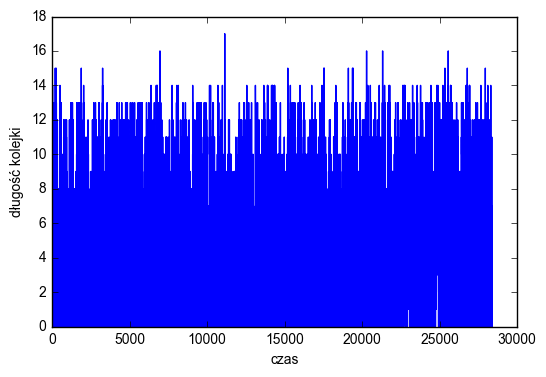

In [5]:
x, y = queue_history.T
plt.plot(x,y)
plt.xlabel(u"czas")
plt.ylabel(u"długość kolejki")
plt.savefig('pictures/queue_length_exponential.jpg')
plt.show()